<a href="https://colab.research.google.com/github/NagaSuryaManikanta/APPLab/blob/main/Myproject1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("water_potability.csv")
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [4]:
df.shape

(3276, 10)

In [6]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [8]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [10]:
df.fillna(df.mean(),inplace=True)
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [11]:
df.Potability.value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

<ipython-input-14-48fab1294798>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['ph'])


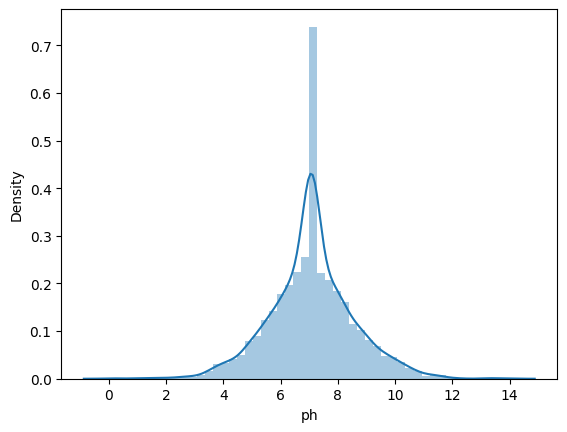

In [14]:
sns.distplot(df['ph'])
plt.show()

In [15]:
X=df.drop('Potability',axis=1)
Y=df['Potability']

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=100,shuffle=True)

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
dt=DecisionTreeClassifier(criterion='gini',min_samples_split=10,splitter='best')
dt.fit(X_train,Y_train)

DecisionTreeClassifier(min_samples_split=10)

In [24]:
pt=dt.predict(X_test)
print(f"Accuracy score = {accuracy_score(Y_test,pt)*100}")
print(f"Confusion report = \n{confusion_matrix(Y_test,pt)}")
print(f"Classification report = {classification_report(Y_test,pt)}")

Accuracy score = 58.84146341463414
Confusion report = 
[[270 130]
 [140 116]]
Classification report =               precision    recall  f1-score   support

           0       0.66      0.68      0.67       400
           1       0.47      0.45      0.46       256

    accuracy                           0.59       656
   macro avg       0.57      0.56      0.56       656
weighted avg       0.59      0.59      0.59       656



In [26]:
r=dt.predict([[5.73,120.5,25000,7.25645,355.567,567.545,13,74,4.2344]])[0]
r

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0

Using KNN


In [27]:
from sklearn.neighbors import KNeighborsClassifier
# Creating model object
model_kn = KNeighborsClassifier(n_neighbors=9, leaf_size=20)

In [29]:
# Training Model
model_kn.fit(X_train, Y_train)

KNeighborsClassifier(leaf_size=20, n_neighbors=9)

In [30]:
# Making Prediction
pred_kn = model_kn.predict(X_test)

In [32]:
# Calculating Accuracy Score
kn = accuracy_score(Y_test, pred_kn)
print(kn)

0.5533536585365854


In [34]:
print(classification_report(Y_test,pred_kn))

              precision    recall  f1-score   support

           0       0.60      0.78      0.68       400
           1       0.37      0.20      0.26       256

    accuracy                           0.55       656
   macro avg       0.49      0.49      0.47       656
weighted avg       0.51      0.55      0.52       656



In [35]:
r=model_kn.predict([[5.73,120.5,25000,7.25645,355.567,567.545,13,74,4.2344]])[0]
r

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0